<a href="https://colab.research.google.com/github/Mbigdeli2003/Game-Theory/blob/main/GTHW5_Q4_3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

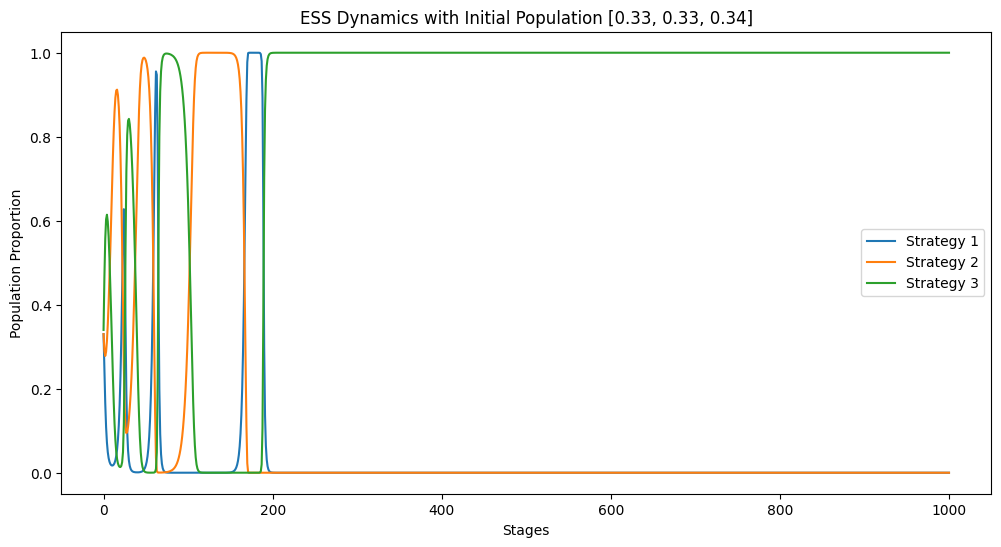

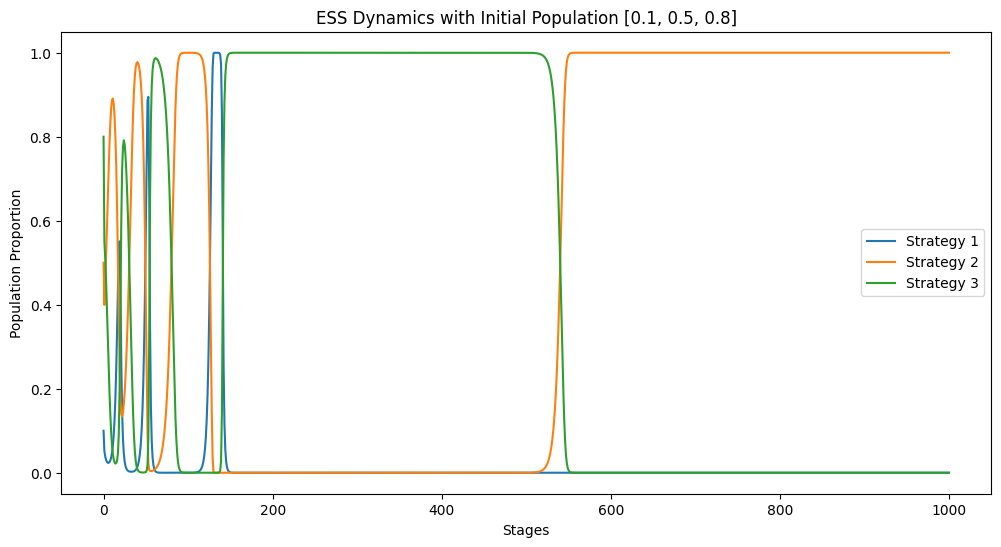

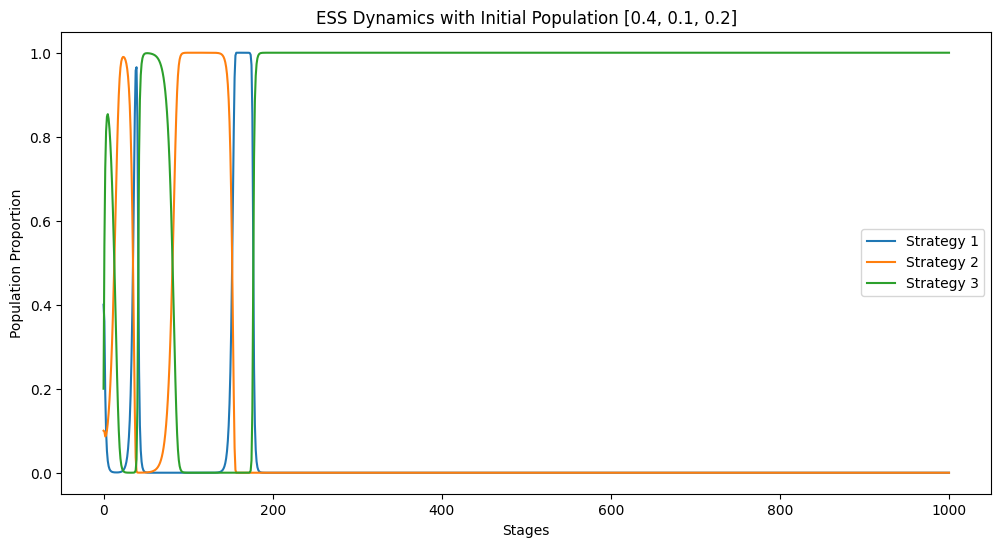

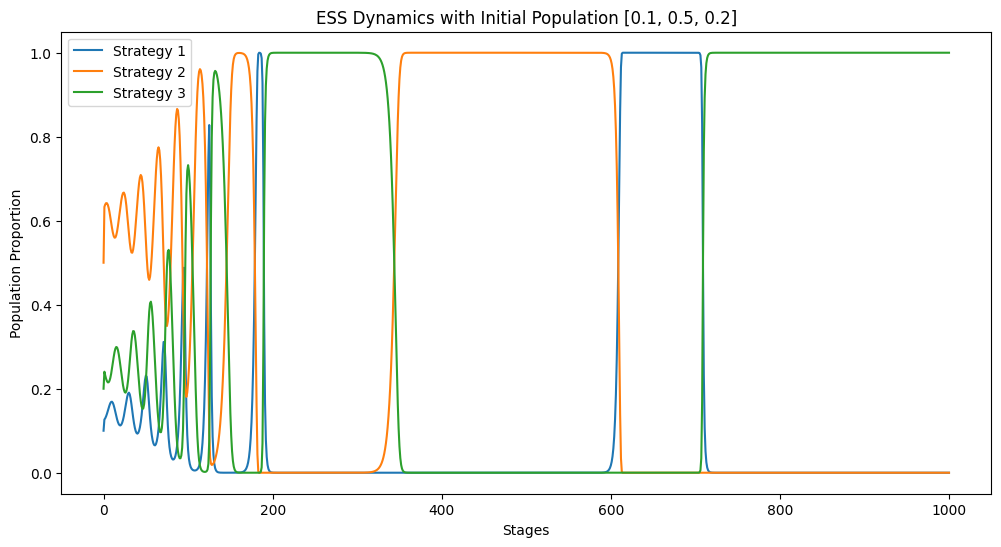

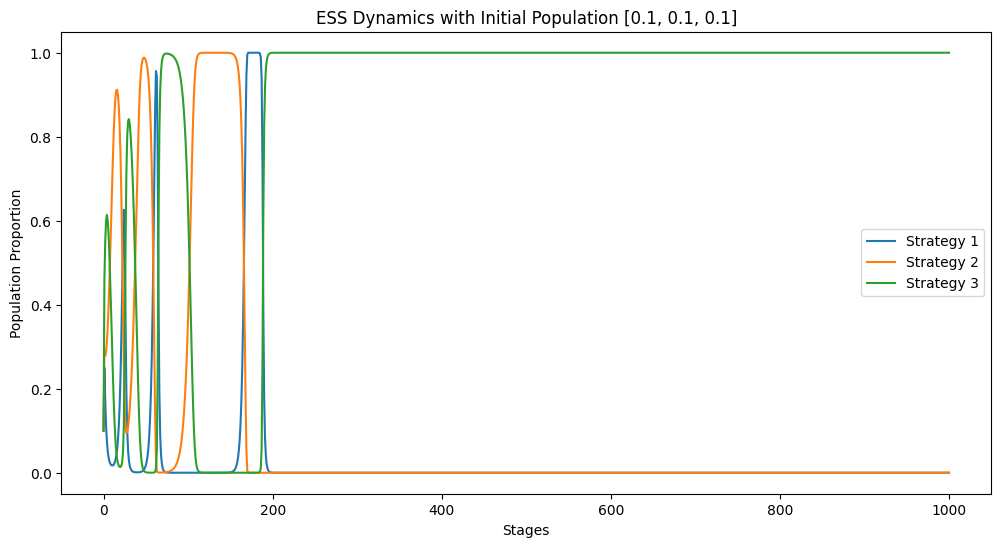

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def fictitious_dynamics(payoff_matrix, initial_population, stages):
    population = np.array(initial_population, dtype=float)
    history = [population.copy()]

    for stage in range(stages):
        fitness = payoff_matrix @ population
        avg_fitness = population @ fitness
        population = population * (fitness / avg_fitness)
        history.append(population.copy())

    return np.array(history)

def visualize_dynamics(history, title="fictitious Dynamics"):
    stages = history.shape[0]
    strategies = history.shape[1]
    plt.figure(figsize=(12, 6))
    for i in range(strategies):
        plt.plot(range(stages), history[:, i], label=f"Strategy {i+1}")
    plt.xlabel("Stages")
    plt.ylabel("Population Proportion")
    plt.title(title)
    plt.legend()
    plt.show()

# Payoff matrix
payoff_matrix = np.array([
    [1, 3, 2],
    [0, 2, 5],
    [6, 1, 4]
])

# Initial population (sum should be 1)
initial_population = [0.33, 0.33, 0.34]

# Number of stages
stages = 1000

# Run the replicator dynamics
history = fictitious_dynamics(payoff_matrix, initial_population, stages)

# Visualize the dynamics
visualize_dynamics(history, "ESS Dynamics with Initial Population [0.33, 0.33, 0.34]")

# Different initial conditions
initial_conditions = [
    [0.1, 0.5, 0.8],
    [0.4, 0.1, 0.2],
    [0.1, 0.5, 0.2],
    [0.1, 0.1, 0.1]
]

for initial_population in initial_conditions:
    history = fictitious_dynamics(payoff_matrix, initial_population, stages)
    visualize_dynamics(history, f"ESS Dynamics with Initial Population {initial_population}")
